In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
data= pd.read_csv('C:/Users/USER/Desktop/Wine_clust.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 13)

In [2]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
X =data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values

##### Kmeans Clustering


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


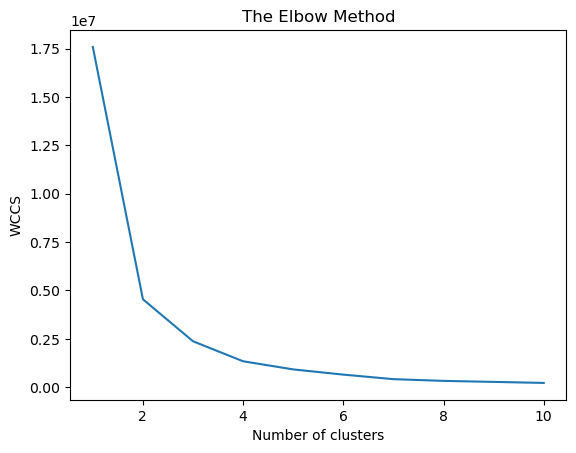

In [7]:
from sklearn.cluster import KMeans
wccs =[] #emplty list
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)                       
    wccs.append(kmeans.inertia_) 
plt.plot(range(1,11), wccs)       
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCCS')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [9]:
y_kmeans

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2])

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
sil_avg = silhouette_score(X,y_kmeans)

In [12]:
sil_avg 

0.5572288268257268

##### AgglomerativeClustering 

In [13]:
import scipy.cluster.hierarchy as sch

<function matplotlib.pyplot.show(close=None, block=None)>

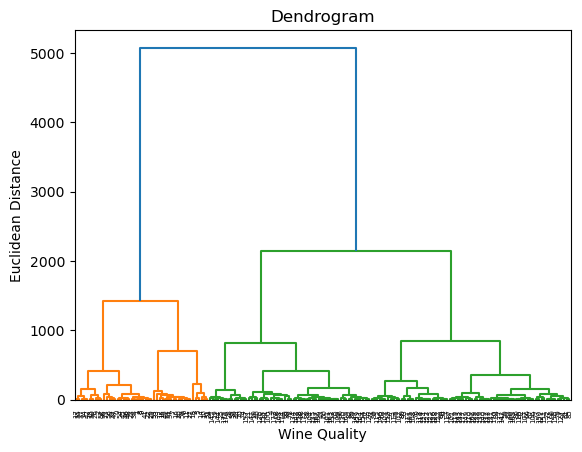

In [15]:
dendrogram = sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine Quality')
plt.ylabel('Euclidean Distance')
plt.show

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc =hc.fit_predict(data)

In [25]:
y_hc

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

In [27]:
sil_avg = silhouette_score(data,y_hc)

In [28]:
sil_avg

0.5644796401732071